<a href="https://colab.research.google.com/github/lucius-yu/colab-tutorial/blob/master/simple_dnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Import liberary

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# set random seed
# tf.random.set_random_seed(36)

# New Section

Loading fashion mnist dataset, preprocessing with normalization

In [5]:
mnist = tf.keras.datasets.fashion_mnist

# load train and test images
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# normalization
training_images  = training_images / 255.0
test_images = test_images / 255.0

4431872/4422102 [==============================] - 0s 0us/step


split training_images into train and validation

In [6]:
X_train, X_valid, y_train, y_valid = train_test_split(training_images, training_labels, test_size=0.3, stratify=training_labels, random_state=42)

print(X_train.shape)
print(X_valid.shape)

(42000, 28, 28)
(18000, 28, 28)


Now, we build a simple DNN model

In [11]:
def get_model(layers=[10],dropout=0.0, lr=0.001):
  # construct the model
  model = tf.keras.Sequential()
  # add flatten layer, flatten 2-dim data into 1-dim vector
  model.add(tf.keras.layers.Flatten())
  # add middle layer
  for num_units in layers:
    model.add(tf.keras.layers.Dense(num_units, activation='relu'))
    if dropout>0:
      model.add(tf.keras.layers.Dropout(rate=dropout))
      
  # add output layer, i.e. 10 class softmax
  model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
  
  # compile
  model.compile("adam",
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [8]:
def plot_loss(history):
  num_epochs = len(history.history['loss'])
  # plot the history
  plt.plot(range(num_epochs), history.history['loss'], label="training loss")
  plt.plot(range(num_epochs), history.history['val_loss'], label="validation loss")

  plt.xlabel("num epochs")
  plt.ylabel("loss")
  plt.title("Train and validation loss")
  plt.legend()
  
  plt.show()

In [17]:
def plot_acc(history):
  num_epochs = len(history.history['accuracy'])
  # plot the history
  plt.plot(range(num_epochs), history.history['accuracy'], label="training accuracy")
  plt.plot(range(num_epochs), history.history['val_accuracy'], label="validation accuracy")

  plt.xlabel("num epochs")
  plt.ylabel("accuracy")
  plt.title("Train and validation accuracy")
  plt.legend()
  
  plt.show()

Start training with train dataset size 10500


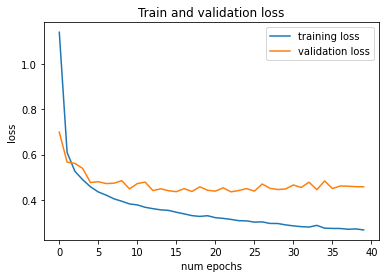

KeyError: ignored

In [12]:
snn_model = get_model()

# train the model
train_size=int(X_train.shape[0]/4)
print("Start training with train dataset size {}".format(train_size))
history=snn_model.fit(X_train[:train_size], y_train[:train_size],verbose=0,validation_data=(X_valid,y_valid), epochs=40)

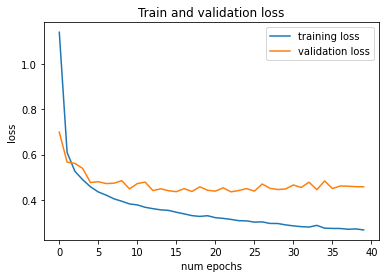

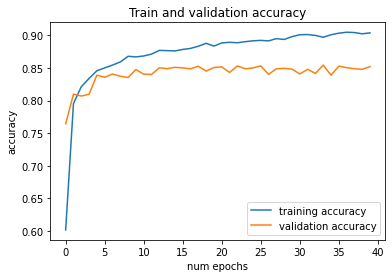

313/313 [==============================] - 1s 2ms/step - loss: 0.4871 - accuracy: 0.8440


[0.4871453642845154, 0.843999981880188]

In [18]:
# plot the result
plot_loss(history)
plot_acc(history)

# evaluate the model
snn_model.evaluate(test_images, test_labels)

More data helpful? 

*   more data improve performance
*   train more epochs with more data.  more data can help variance problem

Let's show it

Start training with train dataset size 42000


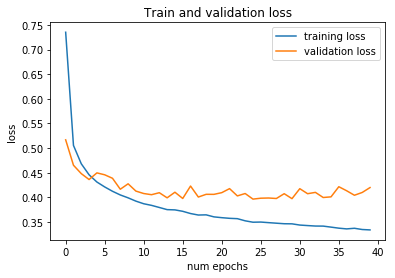

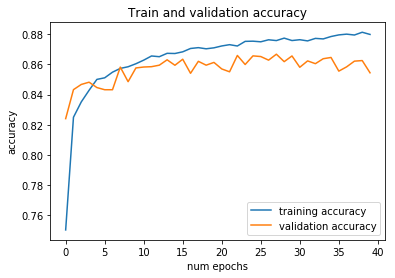

10000/10000 [==============================] - 1s 64us/sample - loss: 0.4505 - acc: 0.8432


[0.4505386787414551, 0.8432]

In [ ]:
# build the model
snn_model = get_model()

# train the model
train_size=int(X_train.shape[0])
print("Start training with train dataset size {}".format(train_size))
history=snn_model.fit(X_train, y_train, validation_data=(X_valid, y_valid), verbose=0, epochs=40)

# plot the reult
plot_loss(history)
plot_acc(history)

# evaluate on test data
snn_model.evaluate(test_images, test_labels)

Obviously, this simple neural network has both bias and variance problem


*   validation and test result are bad. even the training accuracy is far below human performance. this is high bias problem
*   as training with more iteration, before training accuracy reach 90%, the validation and test result starts to drop. this is overfitting to training data, variance problem.


We should handle bias problem first with a deeper and wider model

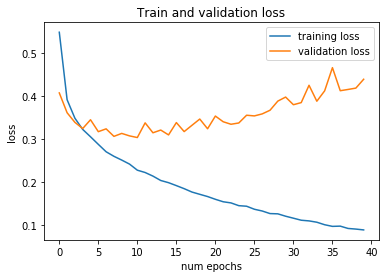

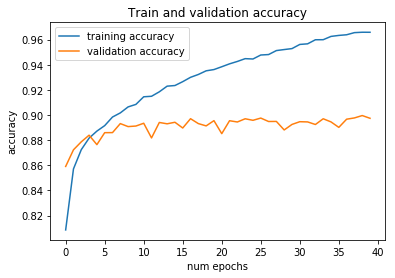

10000/10000 [==============================] - 1s 70us/sample - loss: 0.4877 - acc: 0.8863


[0.4877037228137255, 0.8863]

In [ ]:
# build the model
dnn_model = get_model([128,128], lr=0.0005)

# train the model
history=dnn_model.fit(X_train, y_train, validation_data=(X_valid, y_valid), verbose=0, epochs=40)

# plot result
plot_loss(history)
plot_acc(history)

dnn_model.evaluate(test_images, test_labels)

The bias problem is not solved totally. But at least training accuracy can reach 96%. 

Variance problem (overfitting) becomes more obviously. Please think why variance problem becomore obvious.

Guess, if we can solve the variance problem, what is expected validation loss and validation accuracy. 

Let's try to use Dropout Regularization to handle this high variance problem

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


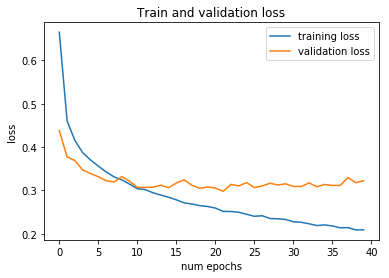

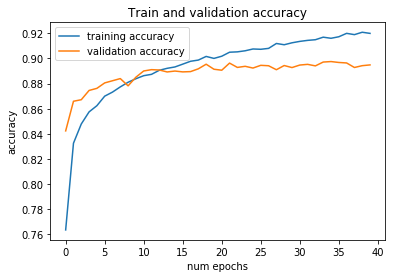

10000/10000 [==============================] - 1s 70us/sample - loss: 0.3472 - acc: 0.8895


[0.3471914584159851, 0.8895]

In [ ]:
dnn_model=get_model([128,128],dropout=0.25,lr=0.0005)

# train the model
history=dnn_model.fit(X_train, y_train, validation_data=(X_valid, y_valid), verbose=0, epochs=40)

# plot result
plot_loss(history)
plot_acc(history)

dnn_model.evaluate(test_images, test_labels)

Using callback to implement early stopping

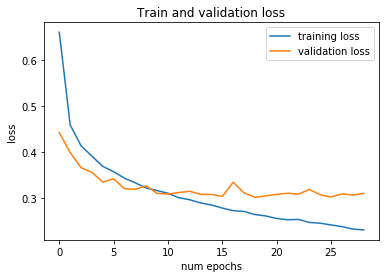

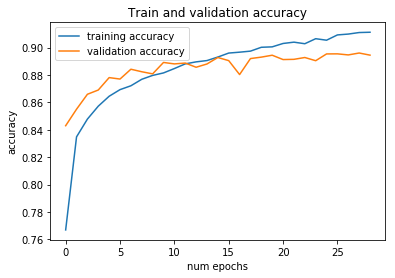

10000/10000 [==============================] - 1s 70us/sample - loss: 0.3366 - acc: 0.8828


[0.33664662984609606, 0.8828]

In [ ]:
callbacks = [
  # Interrupt training if `val_loss` stops improving for over 10 epochs
  tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss', restore_best_weights=True),
]

dnn_model=get_model([128,128],dropout=0.25,lr=0.0005)

# train the model
history=dnn_model.fit(X_train, y_train, validation_data=(X_valid, y_valid), callbacks=callbacks, verbose=0, epochs=40)

# plot result
plot_loss(history)
plot_acc(history)

dnn_model.evaluate(test_images, test_labels)